### Constraints and Domain-Reduction Algorithm

Sequentially reduce the values domain ($x_i$, $D_i$) of each problem variable ($x_i$), eventually converging to a solution if it exists

* **Pseudo-code Domain Reduction Algorithm**
```python
    for each dfs assignment -j- (i.e. states in a map)
        for each variable v_i considered (*)
            for each value x_i of v_i domain D_i
                for each constraint C(x_i, x_j) where x_j belongs to D_j
                    if not exist x_j such C(x_i, x_j) satisfied
                        remove x_i from D_i
                    if D_i empty
                        backtracking (DFS)
```

- Possible outcomes:
1. No solution is found and DFS empties the queue, finishes before converging to anything
2. DFS takes longer than the age of the universe (bad)
3. algorithm takes too little to get to the solution (excess of resource allocated for this task, too many colors?)

**(*) Considered???**


### Map coloring problem
Colored the regions of a map with the least amount of colors and such that NO neighbor states share the same color. In this project I'll work with a graph like implementation of a map.

In [47]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from collections import deque
from functools import partial
from itertools import cycle

import networkx as nx 


In [48]:
# Create graph and add color domain
G = nx.erdos_renyi_graph(10, 0.4, seed=12)
positions = nx.spring_layout(G, seed=1965)

colors = ["red", "green", "blue", "yellow"]

for node in G.nodes():
    G.nodes[node]["domain"] = colors.copy()

G.nodes[0]

{'domain': ['red', 'green', 'blue', 'yellow']}

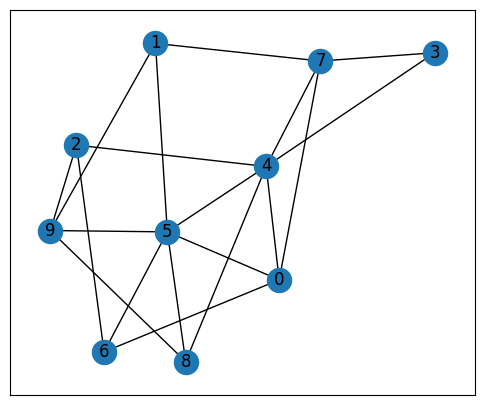

In [41]:
fig, ax = plt.subplots(figsize=(6, 5))
nx.draw_networkx(G, pos=positions, ax=ax)
plt.show()

In [70]:
next_color = {cc: nc for cc, nc in zip(colors[:-1], colors[1:])}
next_color[colors[-1]] = colors[0]
next_color

{'red': 'green', 'green': 'blue', 'blue': 'yellow', 'yellow': 'red'}

In [85]:
def domain_reduction(G, node, color):
    """Part of DFS coloring algo, returns False indicating dead end"""
    # considered = check neighbors
    for neighbor in G.adj[node]:
        for n_color in G.nodes[neighbor].get("domain", []):
            if color == n_color:
                G.nodes[neighbor]["domain"].remove(n_color)
            if not G.nodes[neighbor].get("domain", []):
                return False
    return True


def graph_dfs_coloring(G, start = 0):
    assert start in G, f"Node {start} not in graph"

    q = deque([(start, 0)])
    color_path = []

    while q:
        node, color_ind = q.popleft()

        if len(color_path) == len(G):
            break

        color_path.append(color_ind)


        if domain_reduction(G, node, colors[color_ind]):
                first_neighbor = list(G.adj[node])[0]
                for i in reversed(range(1, len(colors)+1)):
                    q.appendleft(
                        (first_neighbor, (color_ind + i) % len(colors))
                        )
        else:
            _ = color_path.pop() 
        
    return color_path

color_path = graph_dfs_coloring(G)

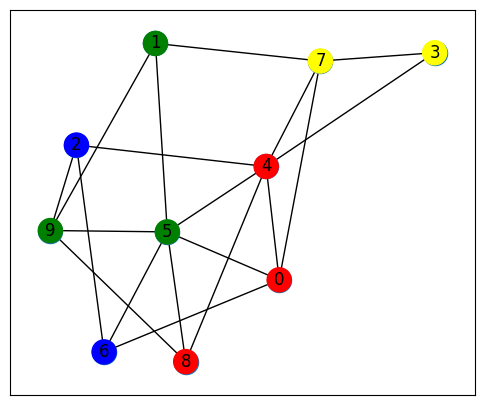

In [86]:
fig, ax = plt.subplots(figsize=(6, 5))
nx.draw_networkx(G, pos=positions, ax=ax)
nx.draw_networkx_nodes(
    G, pos=positions, nodelist=G.nodes(), node_color=[colors[i] for i in color_path], ax=ax
)
plt.show()

In [ ]:
NODE_DEFAULT_COLOR = "#0064e1"

def update(ax, G, node_positions, title, frame):
    ax.clear()
    ax.axis("off")
    ax.set_title(title, horizontalalignment="left")
    background_nodes = nx.draw_networkx_nodes(
        G, nodelist=G.nodes(), pos=node_positions, node_color=NODE_DEFAULT_COLOR, ax=ax,
    )

    graph_edges = nx.draw_networkx_edges(G, pos=node_positions, ax=ax)

    if len(frame) > 1:
        path_edges = nx.draw_networkx_edges(
            G,
            edgelist=[(a, b) for a, b in zip(frame[:-1], frame[1:])],
            pos=node_positions,
            edge_color="red",
            width=1.5,
            ax=ax,
        )

    visited_nodes = nx.draw_networkx_nodes(
        G, nodelist=frame, pos=node_positions, node_color="red", ax=ax
    )

    nodes_labels = nx.draw_networkx_labels(
        G, pos=node_positions, labels={k: k for k in G.nodes}, ax=ax
    )


def animate_search(fig, ax, G, node_positions, title, explored_paths, interval=500):
    return animation.FuncAnimation(
        fig,
        partial(update, ax, G, node_positions, title),
        interval=interval,
        frames=explored_paths,
        repeat=False,
    )